# Bayesian Classifier

## Import libraries

In [26]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.naive_bayes import GaussianNB
import skimage.transform as transform

## Generate codemap example

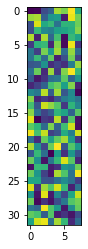

In [27]:
# Codemap size : 32 * 4
size_cm = [32,8]
limit_cm = [0,128]
test_codemap = torch.randint(limit_cm[0], limit_cm[1], (size_cm[0], size_cm[1]))
test_cm_np = test_codemap.numpy().astype(np.uint8)

plt.imshow(test_codemap)

## Resample codemap

In [48]:
# Init variables
coord_pixel = []

# Mouse function to select the pixel to resample
def select_pixel(event,x,y,flags,param):
    global coord_pixel
    if event == cv2.EVENT_LBUTTONDOWN:
        coord_pixel = [x, y]

# Resample element of codemap
cv2.namedWindow('image')
cv2.setMouseCallback('image', select_pixel)
zoom = 10
test_cm_zoomed = transform.rescale(test_cm_np, zoom)
while(True):
    cv2.imshow('image', test_cm_zoomed)
    # Select pixel to resample
    if cv2.waitKey(0) & 0xFF == ord('q'): # press q to exit after selection
        break
cv2.destroyAllWindows()

# Display
coord_pixel = (np.round(np.divide(coord_pixel, zoom))).astype(int)
pixel_x = coord_pixel[0]
pixel_y = coord_pixel[1]
print("Pixel's coordonates : " + str(coord_pixel))
print("Value of the pixel : " + str(test_cm_np[pixel_y][pixel_x]))

Pixel's coordonates : [0 0]
Value of the pixel : 1


In [49]:
# Get the surroundings of the pixel
nb_ngbrs = 2 # number of neighbours to add to the bayesian distribution
ind_max_fr = min(pixel_y + nb_ngbrs + 1, size_cm[0])
ind_min_fr = max(pixel_y - nb_ngbrs, 0)
ind_max_tm = min(pixel_x + nb_ngbrs + 1, size_cm[1])
ind_min_tm = max(pixel_x - nb_ngbrs, 0)
coord_ngbrs = []
values_ngbrs = []

for i in range(ind_min_tm, ind_max_tm):
    for j in range(ind_min_fr, ind_max_fr):
        if abs(i-pixel_x) + abs(j-pixel_y) <= nb_ngbrs and (i!=pixel_x or j!=pixel_y):
            coord_ngbrs.append([i, j])
            values_ngbrs.append(test_cm_np[j][i])

# Init classifier
clf = GaussianNB()
# Fit distribution to the neighbors of pixel
clf.fit(coord_ngbrs, values_ngbrs)
# Predict value
proba_predicted = clf.predict_proba(np.array(coord_pixel).reshape(1, -1))
classes = np.unique(values_ngbrs)
value_predicted = int(round(np.sum(proba_predicted * classes)))

print("Pixel's coordonates : " + str(coord_pixel))
print("Value predicted : " + str(value_predicted))

Pixel's coordonates : [0 0]
Value predicted : 55


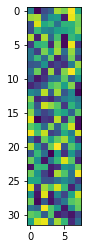

In [50]:
# Resample codemap according to value predicted
codemap_resampled = test_codemap
codemap_resampled[pixel_y][pixel_x] = value_predicted

plt.imshow(codemap_resampled)